In [26]:
import numpy as np
import pandas as pd

ratings = pd.read_csv('C:\\Users\\lenovo\\Documents\\MachineLearning\\ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [28]:
ratings.rename(columns = {'movieId':'movieid'}, inplace = True)
ratings.head()

,userId,movieid,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [8]:
movies = pd.read_csv('C:\\Users\\lenovo\\Documents\\MachineLearning\\movies_metadata.csv')

 

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [11]:
movies_new = movies.filter(['id','original_title','genres'])
movies_new.head()

,id,original_title,genres
0,862,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,8844,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,15602,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,31357,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,11862,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]"


In [20]:
movies_new.rename(columns = {'original_title':'title'}, inplace = True)
movies_new.rename(columns = {'id':'movieId'}, inplace = True)

In [38]:
movies_new[['genres']].head()

,genres
0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,"[{'id': 35, 'name': 'Comedy'}]"


In [39]:
movies_data = pd.concat([ratings,movies_new],axis=1)

In [40]:
movies_data.head()

,userId,movieid,rating,timestamp,movieid,title,genres
0,1,110,1.0,1425941529,862,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
1,1,147,4.5,1425942435,8844,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
2,1,858,5.0,1425941523,15602,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ..."
3,1,1221,5.0,1425941546,31357,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,1,1246,5.0,1425941556,11862,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]"


In [42]:
movies_data.groupby('title')['rating'].mean().head()

title
!Women Art Revolution    2.5
#1 Cheerleader Camp      4.5
#Horror                  5.0
#Pellichoopulu           3.0
#SELFIEPARTY             4.0
Name: rating, dtype: float64

In [43]:
movies_data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Hyènes                     5.0
The Sealed Room            5.0
Just a Kiss                5.0
Just an American Boy       5.0
Just, Melvin: Just Evil    5.0
Name: rating, dtype: float64

In [44]:
movies_data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Alice in Wonderland     8
Hamlet                  8
A Christmas Carol       7
The Three Musketeers    7
Macbeth                 7
Name: rating, dtype: int64

In [45]:
ratings_meancount = pd.DataFrame(movies_data.groupby('title')['rating'].mean())

In [46]:
ratings_meancount['ratings_count'] = pd.DataFrame(movies_data.groupby('title')['rating'].count())

In [47]:
ratings_meancount.head()

,rating,ratings_count
title,,
!Women Art Revolution,2.5,1
#1 Cheerleader Camp,4.5,1
#Horror,5.0,1
#Pellichoopulu,3.0,1
#SELFIEPARTY,4.0,1


<AxesSubplot:>

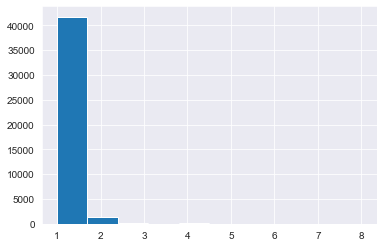

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

plt.figure()
plt.rcParams['patch.force_edgecolor'] = True
ratings_meancount['ratings_count'].hist(bins=10)


<AxesSubplot:>

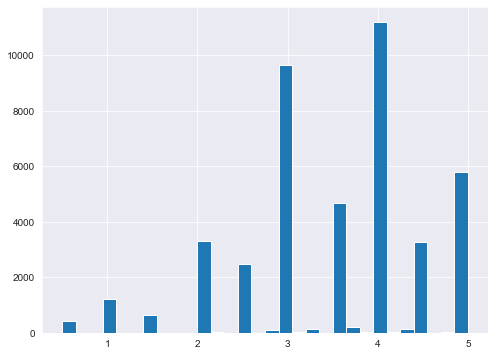

In [56]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_meancount['rating'].hist(bins=30)

<Figure size 576x432 with 0 Axes>

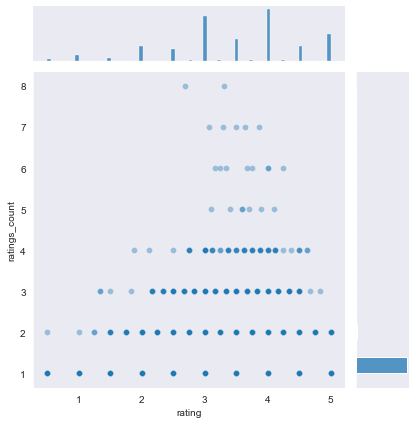

In [57]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating', y='ratings_count', data=ratings_meancount, alpha=0.4)

In [58]:
user_movie_rating = movies_data.pivot_table(index='userId',columns='title',values='rating')

In [66]:
user_movie_rating.head(200)

title,!Women Art Revolution,#1 Cheerleader Camp,#Horror,#Pellichoopulu,#SELFIEPARTY,#chicagoGirl,$ Dollars,$5 a Day,$50K and a Call Girl: A Love Story,$9.99,...,후궁: 제왕의 첩,후회하지 않아,龍在江湖,琉璃樽,０課の女 赤い手錠,１リットルの涙,１３号待避線より その護送車を狙え,２０世紀少年< 第1章> 終わりの始まり,３－４Ｘ１０月,ＳＭガールズ セイバーマリオネットＲ
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
women_art_ratings = user_movie_rating['Alice in Wonderland']


In [76]:
women_art_ratings

userId
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
       ..
473   NaN
474   NaN
475   NaN
476   NaN
477   NaN
Name: Alice in Wonderland, Length: 477, dtype: float64

In [77]:
movies_like_women_art_ratings = user_movie_rating.corrwith(women_art_ratings)

c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
c:\users\lenovo\appdata\local\programs\python\python39\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [78]:
like_women_art = pd.DataFrame(movies_like_women_art_ratings,columns=['Correlation'])

In [79]:
like_women_art.dropna(inplace=True)

In [80]:
like_women_art.head()

,Correlation
title,
Alice in Wonderland,1.0
Blood Moon,-1.0
Genius,1.0
Intruders,1.0
Knock Knock,1.0


In [81]:
like_women_art = like_women_art.join(ratings_meancount['ratings_count'])

In [82]:
like_women_art.head()

,Correlation,ratings_count
title,,
Alice in Wonderland,1.0,8
Blood Moon,-1.0,2
Genius,1.0,2
Intruders,1.0,3
Knock Knock,1.0,2


In [87]:
like_women_art[like_women_art ['Correlation']>0].sort_values('Correlation', ascending=False).head()

,Correlation,ratings_count
title,,
Alice in Wonderland,1.0,8
Genius,1.0,2
Intruders,1.0,3
Pete's Dragon,1.0,2
Knock Knock,1.0,2
